## GRUPO 2: ##
Marta Pizarro       202027959

Diego Quevedo       200914623

Alfredo Hincapié    199817792

Guillermo Andrade   202027949

Elber Pardo         200017815

# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

# 03.1 - Plot and analyze the ACF and PACF of the 4 time series in data_arma.csv:

### What do these plots suggest about the data being an AR or MA process?

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline
sns.set()

In [192]:
path = "C:/Users/marti/Desktop/Maestria IA/Modelos Avanzados de Analisis de Datos/Datasets/"

df = pd.read_csv(path+"data_arma.csv",sep=',',low_memory=False)
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()


,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts1     500 non-null    float64
 1   ts2     500 non-null    float64
 2   ts3     500 non-null    float64
 3   ts4     500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


<AxesSubplot:>

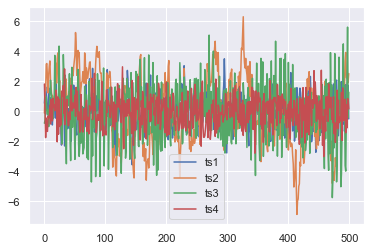

In [194]:
df.plot()

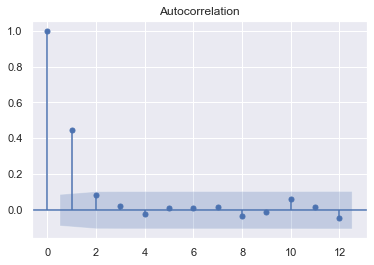

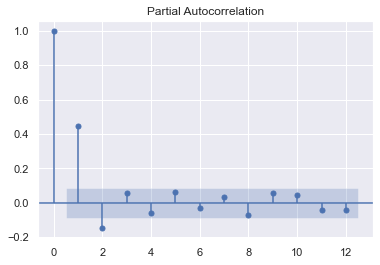

In [195]:
plot_acf(df["ts1"], lags=12);
plot_pacf(df["ts1"], lags=12);

Para ts1 vemos que en la gráfica de autocorrelación se presenta un corte abrupto en el rezago 1 y a partir de ahí tiende a 0, lo que nos lleva a pensar que esta serie se comporta como un modelo MA(1)

Adicional, al evaluar el gráfico de autocorrelación parcial se observa una corte abrupto en el rezago 2, suponiendo entonces un modelo AR(2)

En conclusión, tendríamos un modelo ARMA (2,1)

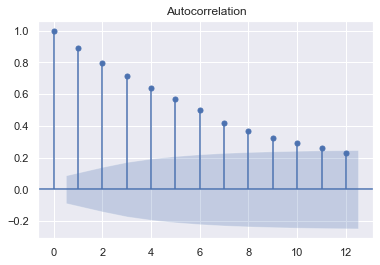

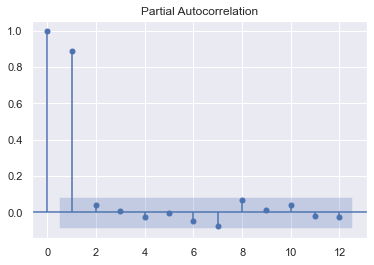

In [196]:
plot_acf(df["ts2"], lags=12);
plot_pacf(df["ts2"], lags=12);

De acuerdo al gráfico de autocorrelación vemos como los rezagos disminuyen geometricamente, por lo que suponemos un modelo AR y conforme a lo observado en el gráfico de autoorrelación parcial vemos un corte abrupto en el rezago 1, por lo que tendríamos un modelo de orden 1

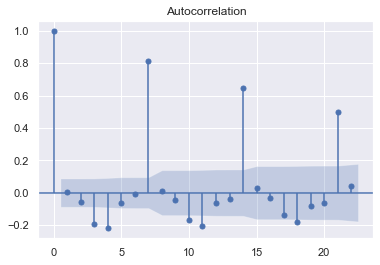

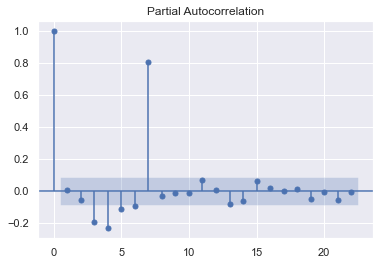

In [197]:
plot_acf(df["ts3"], lags=22);
plot_pacf(df["ts3"], lags=22);

De acuerdo al gráfico de autocorrelación vemos como los rezagos disminuyen geometricamente, por lo que suponemos un modelo AR y conforme a lo observado en el gráfico de autoorrelación parcial vemos un corte abrupto en el rezago 7, por lo que tendríamos un modelo de orden 7

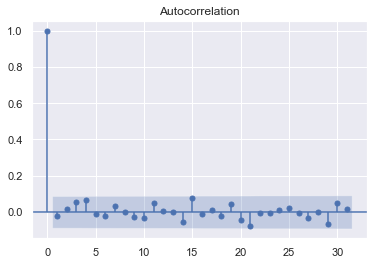

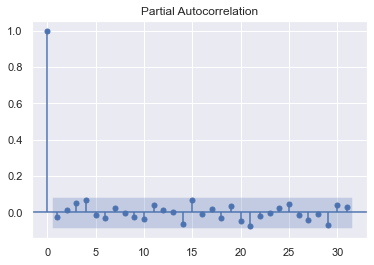

In [198]:
plot_acf(df["ts4"], lags=31);
plot_pacf(df["ts4"], lags=31);

En este caso no tenemos un modelo autoregresivo ni un modelo de media movil

# 03.2 - Using the shampoo dataset:

### Find the parameters p, d q that minimize the mean squared error (MSE) of the rolling forecast.


In [199]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings; 
warnings.simplefilter('ignore')

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64


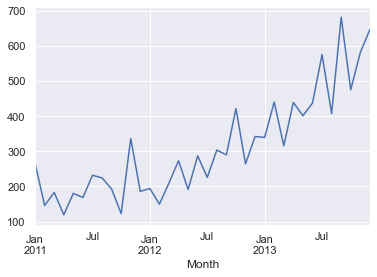

In [200]:
def parser(x):
    return pd.datetime.strptime('201'+x, '%Y-%m')
 
series = pd.read_csv(path+"shampoo.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(6, 4));

In [201]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


No es una serie estacionaria, por lo que pasamos a diferenciar

In [202]:
result = adfuller(series.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


Despues de realizar la primera diferencia la serie pasa la pueba de estcionariedad, por lo que tomaremos d=1

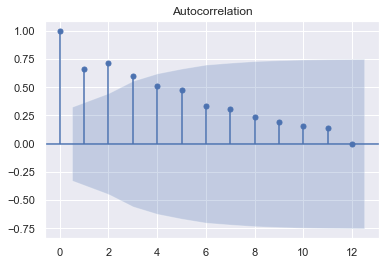

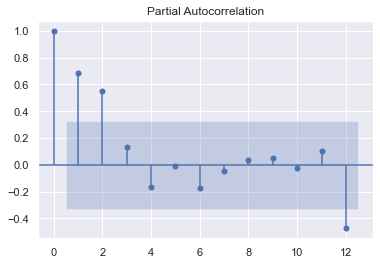

In [203]:
plot_acf(series, lags=12);
plot_pacf(series, lags=12);

En la gráfica de autocorrelación no se evidencia un corte abrupto, por lo que supondremos q=0

De igual forma en la gráfica de autocorelación parcial encontramos un corte abrupto en el rezago 2, tomaremos entonces p=2

In [204]:
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(2,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

       predict   real
0   384.283253  342.3
1   322.633404  339.7
2   365.723568  440.4
3   351.833317  315.9
4   367.966861  439.3
5   368.569616  401.3
6   377.117587  437.4
7   381.628603  575.5
8   388.182068  407.6
9   393.704952  682.0
10  399.746963  475.3
11  405.527761  581.3
12  411.439905  646.9


In [205]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 17833.700


In [206]:
size = int(len(series) * 0.66)
train_2, test_2 = series[0:size], series[size:len(series)]
history_2 = [x for x in train_2]
future_2 = [x for x in test_2]

AR=[0,1,2,3]
DIF=[0,1,2]
MA=[0]

for p in AR:
    for d in DIF:
        for q in MA:
            model_2=ARIMA(history_2, order=(p,d,q))
            model_fit_2 = model_2.fit(disp=0)
            output_2 = model_fit_2.forecast(steps=len(test_2))[0]
            yhat_2 = output_2
            predictions_2 = yhat_2
            real_values_2 = future_2
            error_2 = mean_squared_error(test_2, predictions_2)
            print(p,d,q)
            print('Test MSE:%.3f' % error_2)

    

0 0 0
Test MSE:72159.134
0 1 0
Test MSE:54624.278
0 2 0
Test MSE:2397284.195
1 0 0
Test MSE:71525.015
1 1 0
Test MSE:19189.022
1 2 0
Test MSE:109026.002
2 0 0
Test MSE:63392.341
2 1 0
Test MSE:17833.700
2 2 0
Test MSE:18584.975
3 0 0
Test MSE:65238.021
3 1 0
Test MSE:16994.698
3 2 0
Test MSE:8144.140


Los parametros que minimizan el MSE son:
p=3
d=2
q=0